<a href="https://colab.research.google.com/github/javachka11/Dirichle_Puasson/blob/main/Puasson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix, csr_matrix

In [ ]:
# правая часть
def f(x, y):
  return -(8*np.cos(4*x+3*y) + 100*(2*x-3*y)*np.sin(4*x+3*y) - 8)

# 0 <= x <= 1
def mu_x0(y):
  return -12*y*np.sin(3*y)

def mu_x1(y):
  return 4*((2-3*y)*np.sin(4+3*y) + 1)

# 0 <= y <= 2
def mu_y0(x):
  return 4*(2*x*np.sin(4*x) + np.square(x))

def mu_y1(x):
  return 4*((2*x-6)*np.sin(4*x+6) + np.square(x))

# точное решение
def u(x, y):
  return 4*((2*x-3*y)*np.sin(4*x+3*y) + np.square(x))

In [ ]:
def builder(net):
  xa, xb = 0, 1
  ya, yb = 0, 2
  hx, hy = net[0], net[1]
  Nx = int((xb - xa)/hx) - 1
  Ny = int((yb - ya)/hy) - 1

  #A = np.zeros( shape=(Nx*Ny, Nx*Ny) )
  A = lil_matrix((Nx*Ny, Nx*Ny))
  b = np.zeros(Nx*Ny)

  xx = [xa + (i+1)*net[0]  for i in range(Nx)]
  yy = [ya + (i+1)*net[1]  for i in range(Ny)]
  
  for i in range(Ny):
    for j in range(Nx):
      A[Nx*i+j, Nx*i+j] = 2*(hx**2 + hy**2)
      mu1, mu2 = 0, 0

      if i == 0:
        mu1 = mu_y0(xx[j])
        A[Nx*i+j, Nx*(i+1)+j] = -hx**2
      elif i == Ny-1:
        mu1 = mu_y1(xx[j])
        A[Nx*i+j, Nx*(i-1)+j] = -hx**2
      else:
        A[Nx*i+j, Nx*(i+1)+j] = -hx**2
        A[Nx*i+j, Nx*(i-1)+j] = -hx**2

      if j == 0:
        mu2 = mu_x0(yy[i])
        A[Nx*i+j, Nx*i+j+1] = -hy**2
      elif j == Nx - 1:
        mu2 = mu_x1(yy[i])
        A[Nx*i+j, Nx*i+j-1] = -hy**2
      else:
        A[Nx*i+j, Nx*i+j+1] = -hy**2
        A[Nx*i+j, Nx*i+j-1] = -hy**2

      b[Nx*i+j] = -f(xx[j], yy[i])*(hx**2)*(hy**2) + mu1*hx**2 + mu2*hy**2
  A = csr_matrix(A)
  return (A, b)

In [ ]:
def min_nevyazka(A, b, eps):
  n = len(A.toarray())
  y = np.ones(n)
  Ay = A.dot(y)
  yy0 = norm(Ay - b)
  yy = yy0
  while yy > eps*yy0:
    r = Ay - b
    Ar = A.dot(r)
    tau = Ar.dot(r) / Ar.dot(Ar)
    y = y - tau*r
    Ay = A.dot(y)
    yy = norm(Ay - b)
  return y

In [ ]:
def main():
  hx = 0.01
  hy = 0.01
  net = (hx, hy)
  A, b = builder(net)

  xa, xb = 0, 1
  ya, yb = 0, 2
  Nx = int((xb - xa)/hx) - 1
  Ny = int((yb - ya)/hy) - 1
  y = min_nevyazka(A, b, 1e-10)

  xx = [xa + (i+1)*net[0]  for i in range(Nx)]
  yy = [ya + (i+1)*net[1]  for i in range(Ny)]

  y0 = np.array([u(i, j) for j in yy for i in xx])

  err = max(np.abs(y - y0))

  print(err)

  y = y.reshape((Ny, Nx))
  plt.imshow(y, extent=[0, 1, 0, 2], interpolation = 'bilinear', cmap = 'jet', origin='lower')

0.0012428982190559879


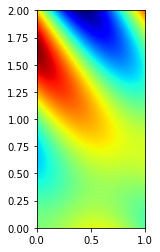

In [ ]:
main()

In [ ]:
_xx = np.linspace(0, 1, 101)
_yy = np.linspace(0, 2, 201)

_uu = [u(x, y) for x in _xx for y in _yy]
_uu1 = [(x, y) for x in _xx for y in _yy]

_i = _uu.index(min(_uu))
_uu1[_i] 0.0012428982190559879  0.12324370094520454

(0.43, 2.0)